In [0]:
from keras import Model
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)

In [0]:
!wget https://github.com/girishkuniyal/Cat-Dog-CNN-Classifier/blob/master/resources/dogcat_model_bak.h5

In [0]:
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.optimizers import Adam

from warnings import filterwarnings
filterwarnings('ignore')

In [0]:
classifier = Sequential()
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2)) #if stride not given it equal to pool filter size
classifier.add(Conv2D(32,(3,3),activation = 'relu'))
classifier.add(MaxPooling2D(pool_size=(2,2),strides=2))
classifier.add(Flatten())
classifier.add(Dense(units=128,activation='relu'))
classifier.add(Dense(units=1,activation='sigmoid'))

# adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
# classifier.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
from keras.models import load_model

classifier.load_weights('/content/dogcat_model_bak.h5')

In [0]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               802944    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 129       
Total para

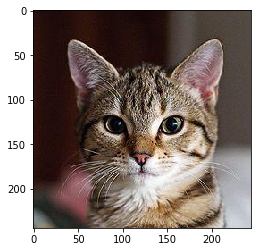

In [0]:
from keras_preprocessing import image
from matplotlib import pyplot as plt
import numpy as np

# img_path = '/content/Cat03.jpg'
img_path = '/content/cat.jpg'
#Input Image for Layer visualization
img1 = image.load_img(img_path)
plt.imshow(img1)

#preprocess image
img1 = image.load_img(img_path, target_size=(64, 64))
img = image.img_to_array(img1)
img = img/255
img = np.expand_dims(img, axis=0)

In [0]:
classifier.predict(img)

array([[0.96345246]], dtype=float32)

In [0]:
model_layers = [ layer.name for layer in classifier.layers]
print('layer name : ',model_layers)

layer name :  ['conv2d_11', 'max_pooling2d_11', 'conv2d_12', 'max_pooling2d_12', 'flatten_6', 'dense_11', 'dense_12']


In [0]:
from keras.models import Model

conv2d_11_output = Model(inputs=classifier.input, outputs=classifier.get_layer('conv2d_11').output)
max_pooling2d_11_output = Model(inputs=classifier.input, outputs=classifier.get_layer('max_pooling2d_11').output)
conv2d_12_output = Model(inputs=classifier.input,outputs=classifier.get_layer('conv2d_12').output)
max_pooling2d_12_output = Model(inputs=classifier.input, outputs=classifier.get_layer('max_pooling2d_12').output)


In [0]:
conv2d_11_features = conv2d_11_output.predict(img)
conv2d_12_features = conv2d_12_output.predict(img)
print('1st conv layer feature output shape : ',conv2d_11_features.shape)
print('2nd conv layer feature output shape : ',conv2d_12_features.shape)


max_pool_11_featues = max_pooling2d_11_output.predict(img)
max_pool_12_featues = max_pooling2d_12_output.predict(img)
print('1st max pool layer feature output shape:', max_pool_11_featues.shape)
print('2nd max pool layer feature output shape:', max_pool_12_featues.shape)

1st conv layer feature output shape :  (1, 62, 62, 32)
2nd conv layer feature output shape :  (1, 29, 29, 32)
1st max pool layer feature output shape: (1, 31, 31, 32)
2nd max pool layer feature output shape: (1, 14, 14, 32)


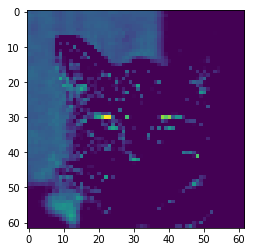

In [0]:
# show filter 4 image
plt.imshow(conv2d_11_features[0, :, :, 4])

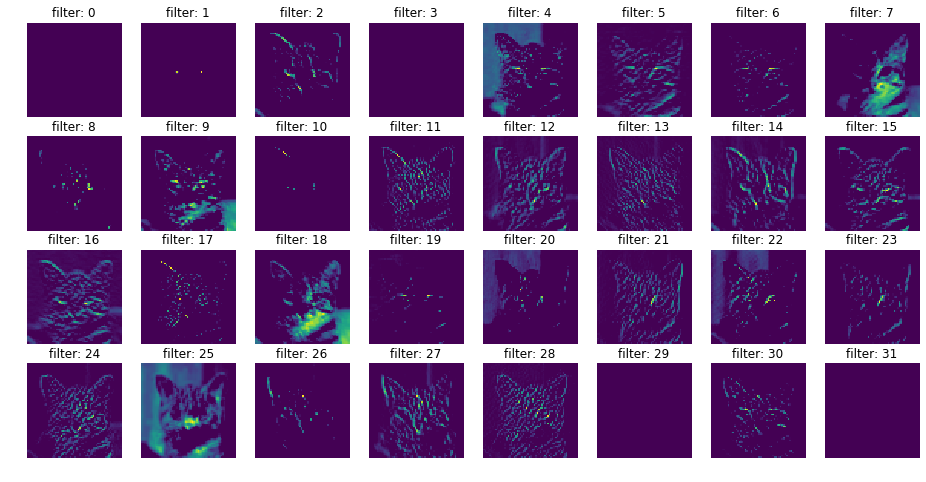

In [0]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(conv2d_11_features[0, :, :, i])
plt.show()

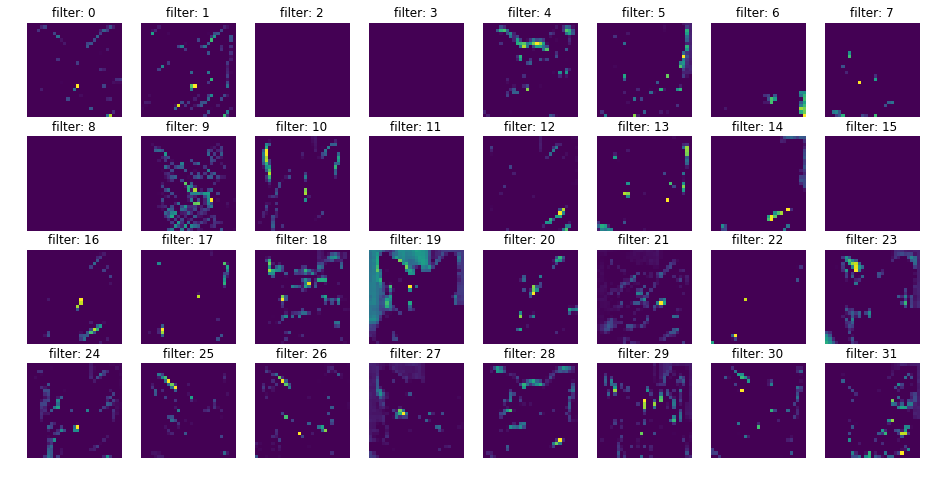

In [0]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(conv2d_12_features[0, :, :, i])
plt.show()

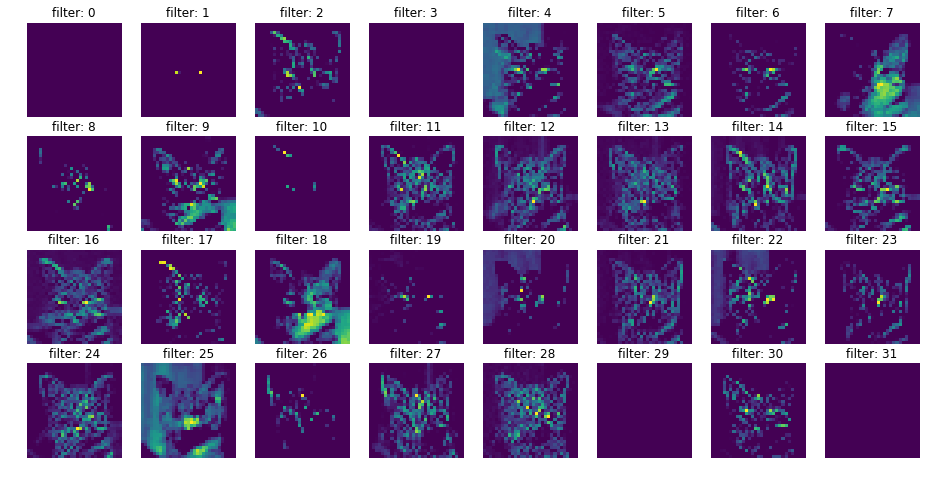

In [0]:
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(max_pool_11_featues[0, :, :, i])
plt.show()

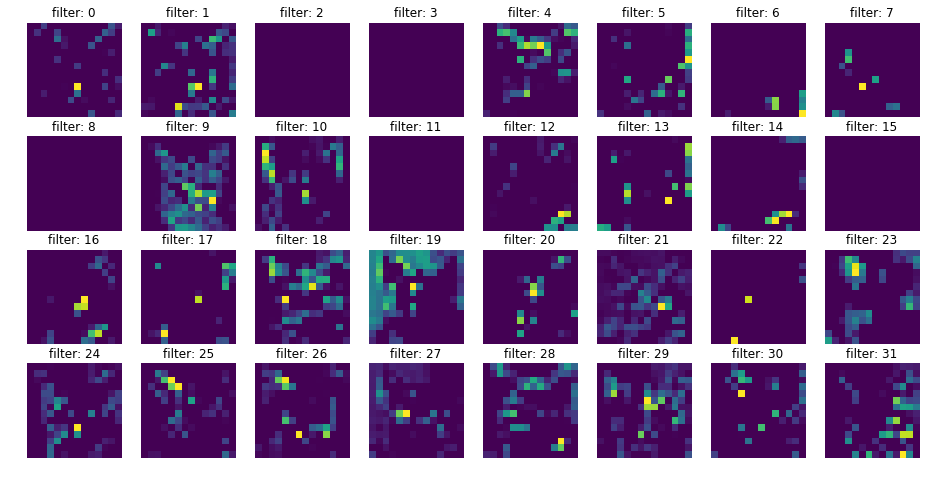

In [0]:
# 2nd max poo
fig = plt.figure(figsize=(16,8))
columns = 8
rows = 4
for i in range(columns*rows):
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')
    plt.title('filter: ' + str(i))
    plt.imshow(max_pool_12_featues[0, :, :, i])
plt.show()

In [0]:
dense_11_output = Model(inputs=classifier.input, outputs=classifier.get_layer('dense_11').output)
dense_11_featues = dense_11_output.predict(img)
print('dense_11_feature_shape', dense_11_featues.shape)

dense_11_feature_shape (1, 128)


In [0]:
print(dense_11_featues[0].flatten())

[ 0.          0.          0.          0.          0.          0.
  0.         36.451324    0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  3.657269    0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 15.2112875   0.          9.195012    0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         15.807313    0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  1.9712834   0.          0.          0.          0.          0.
  0.          8.740007    0.          0.          0.          0.
  0.          0.          0.84003395 12.38753     0.          0.
  0.          0.         